# Life Expectancy and GDP
The goal of this project is to figure out if there is a relation between the Life Expectancy of a person and the GDP of the country, where the person was born. Side goal is to try and strengthen visualization skills.

First, all necessary packages are imported for this porject.

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After the initialization of the packages, let's take a look at the given data.

In [1]:
# Import data
data = pd.read_csv('all_data.csv')
print(data.head())

# Adjust name of USA
data.Country.mask(data.Country == 'United States of America', 'USA', inplace=True)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Now we have seen the structure of the data. The next step is to calculate some statistics. I want to know, what the mean Life Expectancy and mean GDP is for every year. 

In [78]:
# Create empty lists and loop through each year
mean_LE = []
mean_GDP = []

for year in data.Year.unique():
    temp_data = data.loc[data['Year']==year]
    mean_LE.append(np.mean(temp_data['Life expectancy at birth (years)']))
    mean_GDP.append(np.mean(temp_data['GDP'])/1000000000000)

Now I want to create a visualisation of the development of the mean Life Expectancy and mean GDP in one graph.

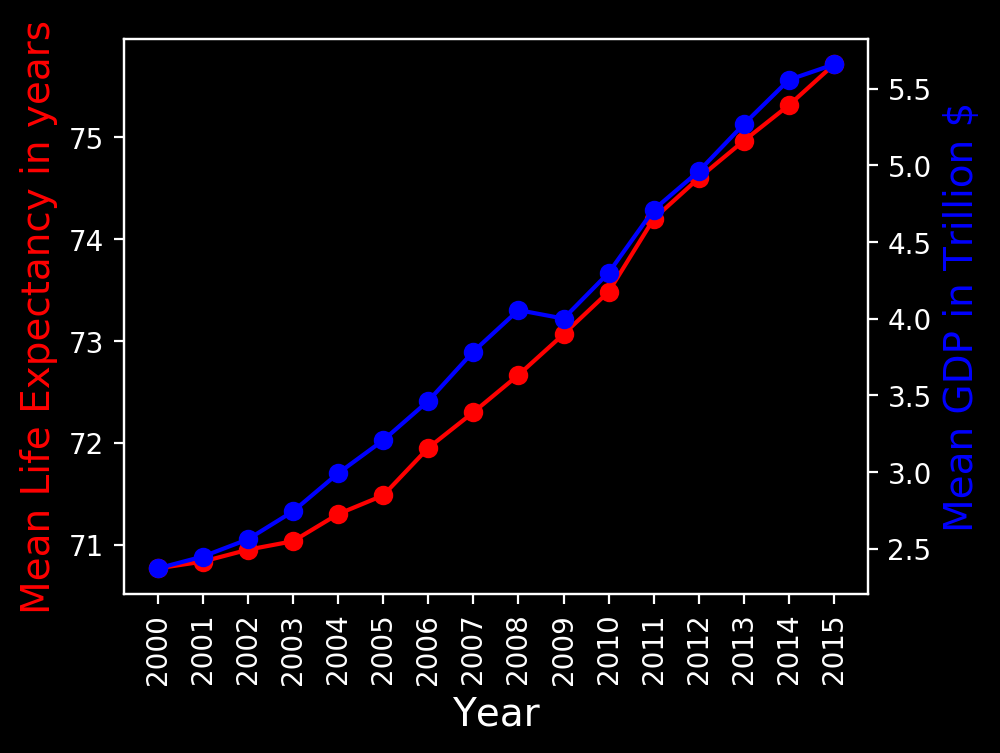

<Figure size 480x360 with 0 Axes>

In [79]:
# Create first plot in one graph
fig,ax = plt.subplots()
ax.plot(data.Year.unique(),
        mean_LE,
        color="red", 
        marker="o")
ax.set_xlabel("Year", fontsize = 14)
ax.set_xticks(data.Year.unique())
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Mean Life Expectancy in years",
              color="red",
              fontsize=14)

# Create second plot in one graph
ax2=ax.twinx()
ax2.plot(data.Year.unique(),
         mean_GDP,
         color="blue",
         marker="o")
ax2.set_ylabel("Mean GDP in Trillion $",color="blue",fontsize=14)
plt.show()
plt.clf()

From the graph above we can see, that the mean Life Expectancy and the mean GDP rose almost in the same pattern from 2000 to 2015.

Now let's focus on the development of Life Expectancy and GDP in each of the 6 countries.

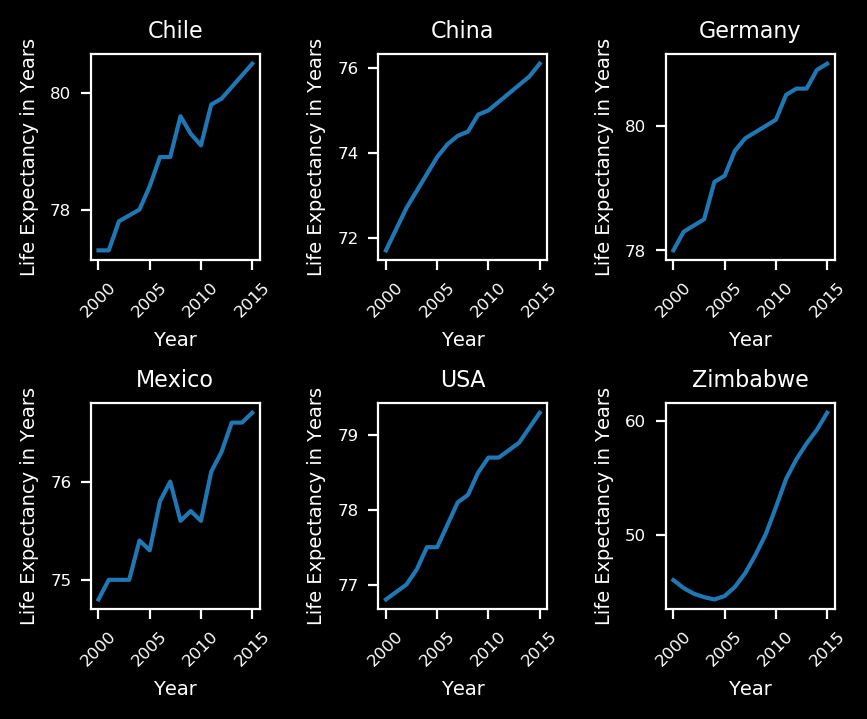

<Figure size 480x360 with 0 Axes>

In [80]:
# Create a graph as a subplot for the development of Life Expectancy for every country
countries = data.Country.unique()
xaxis5 = [2000, 2005, 2010, 2015]
for i in range(0, len(data.Country.unique())):
    temp_data = data.loc[data['Country']==countries[i]]
    plt.subplot(2,3,i+1)
    plt.plot(temp_data.Year, temp_data['Life expectancy at birth (years)'])
    plt.title('%s'%countries[i], fontsize=8)
    plt.xticks(xaxis5, rotation=45, fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel('Year', fontsize=7)
    plt.ylabel('Life Expectancy in Years', fontsize=7)
plt.subplots_adjust(hspace=0.7,wspace=0.7)
plt.show()
plt.clf()

We can see in the graphs above, that through the years the life expecntancy in every country rose. But, in Chile and Mexico around 2010 and in Zimbabwe around 2005 the Life Expectancy in these countries decreased. My assumption for Mexico and Chile this could be an effect of the econimc crises of 2007. Maybe there is a similar reason for Zimbabwe.

Let's see if this hypothesis could be true and watch at the GDP of the countries. Next we are going to make a similar figure for the GDP.

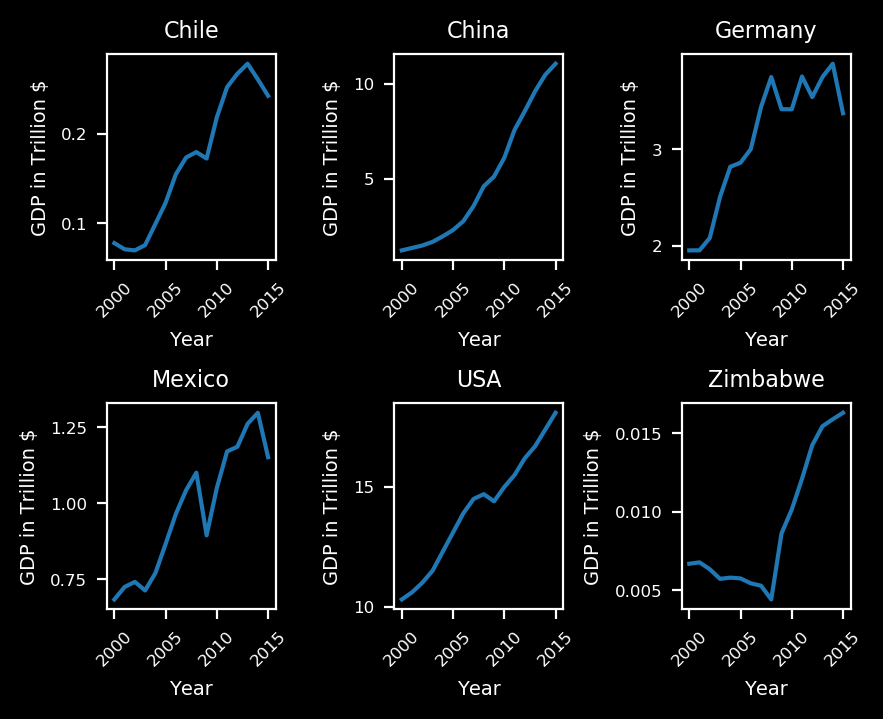

<Figure size 480x360 with 0 Axes>

In [81]:
# Create a graph as a subplot for the development of GDP for every country
countries = data.Country.unique()
for i in range(0, len(data.Country.unique())):
    temp_data = data.loc[data['Country']==countries[i]]
    plt.subplot(2,3,i+1)
    plt.plot(temp_data.Year, temp_data['GDP']/1e12)
    plt.title('%s'%countries[i], fontsize=8)
    plt.xticks(xaxis5, rotation=45, fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel('Year', fontsize=7)
    plt.ylabel('GDP in Trillion $', fontsize=7)
plt.subplots_adjust(hspace=0.7,wspace=0.7)
plt.show()
plt.clf()

In the figure above we can see, that there was an economical decrease (GDP) in Chile and Mexico in 2010 and in Zimbabwe until around 2008. The stagnant course of GDP in Germany, otherwise, had no effect on the life expectancy. On the other hand, in China and the USA both, the GDP and the Life Expectancy rose through the years. Even during the world wide economic crisis in 2007.

Next we will try to figure out, if there is a correlation of Life Expectancy and GDP in each country.

In [25]:
# Test cell
countries = data.Country.unique()
print(countries[0])

Chile
